Installing Keras:

https://www.educative.io/edpresso/how-to-install-keras-in-anaconda

Exponential distribution:

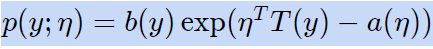

Softmax regression: 

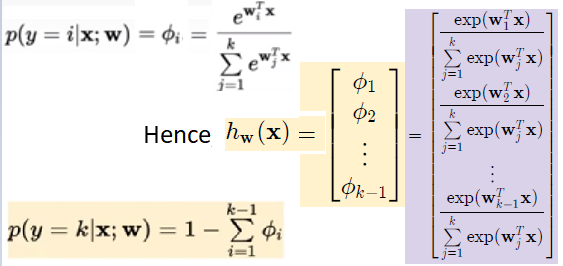

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

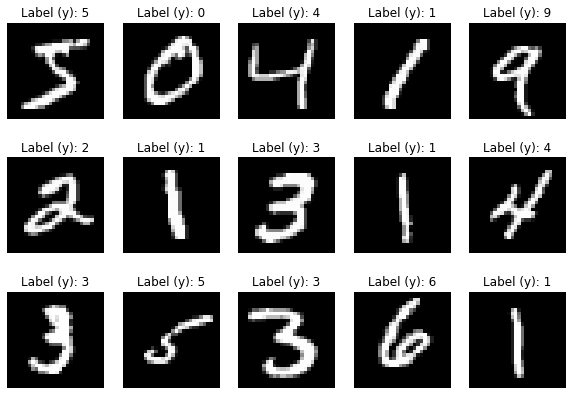

In [4]:
#Plotting some data samples
fig = plt.figure(figsize=(10, 7))
for i in range(15):
    ax = fig.add_subplot(3,5,i + 1)
    ax.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    ax.set_title(f'Label (y): {y_train[i]}')
    plt.axis('off')

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28 * 28)
X_test = X_test.reshape(X_test.shape[0], 28 * 28)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# For softmax regression, we've to one-hot encode y
def convert_to_one_hot_encoding(y, k):
    y_one_hot = np.zeros((len(y), k))
    y_one_hot[np.arange(len(y)), y] = 1
    return y_one_hot

Model:

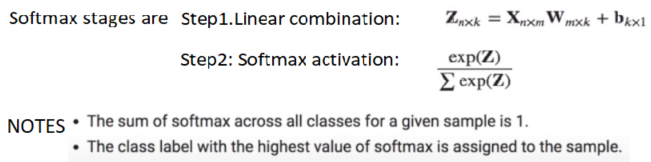

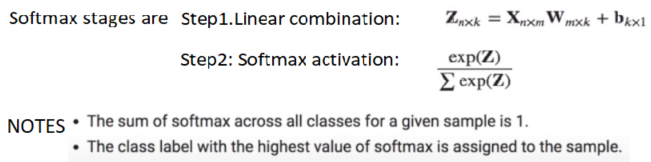

In [8]:
def linear_combination(X, w, b):
    return X @ w + b

In [9]:
def softmax(z):
    # subtracting max of z for numerical stability
    exp = np.exp(z - np.max(z))
    for i in range(len(z)):
        exp[i] /= np.sum(exp[i])
    
    return exp

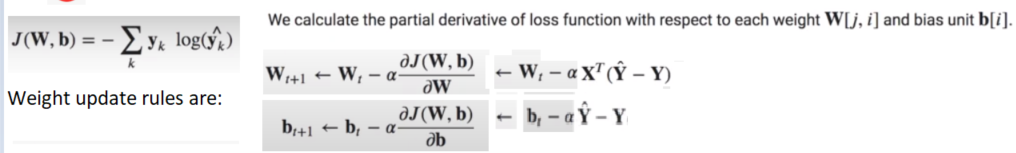

In [10]:
def fit(X, y, lr, k, epochs):
    n, m = X.shape
    
    w = np.random.random((m, k))
    b = np.random.random(k)
    
    losses = []
    
    for epoch in range(epochs):
        z = linear_combination(X, w, b)
        y_hat = softmax(z)
        y_hot = convert_to_one_hot_encoding(y, k)
        
        w_grad = (1/n) * (X.T @ (y_hat - y_hot))
        b_grad = (1/n) * np.sum(y_hat - y_hot)
        
        w = w - lr * w_grad
        b = b - lr * b_grad
        
        loss = -np.mean(np.log(y_hat[np.arange(len(y)), y]))
        losses.append(loss)
    return w, b, losses

In [11]:
def predict(X, w, b):
    z = X @ w + b
    y_hat = softmax(z)
    return np.argmax(y_hat, axis=1)

In [12]:
def accuracy(y, y_hat):
    return np.sum(y == y_hat) / len(y)

In [13]:
# Training with the mnist images
w, b, l = fit(X_train, y_train, lr=0.9, k=10, epochs=100)

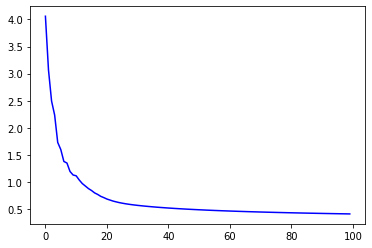

In [14]:
#Learning curve
plt.figure()
plt.plot(np.arange(len(l)), l, 'b-')

In [15]:
#Training accuracy
train_preds = predict(X_train, w, b)
accuracy(y_train, train_preds)

0.8792

In [16]:
#Test accuracy
test_preds = predict(X_test, w, b)
accuracy(y_test, test_preds)

0.8855

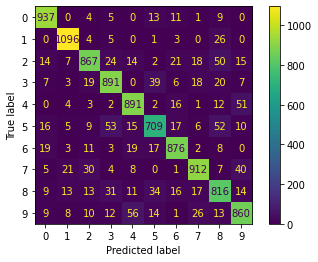

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_preds)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, test_preds))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       980
           1       0.94      0.97      0.96      1135
           2       0.89      0.84      0.87      1032
           3       0.87      0.88      0.87      1010
           4       0.88      0.91      0.89       982
           5       0.85      0.79      0.82       892
           6       0.90      0.91      0.91       958
           7       0.91      0.89      0.90      1028
           8       0.81      0.84      0.82       974
           9       0.86      0.85      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.89      0.89      0.89     10000



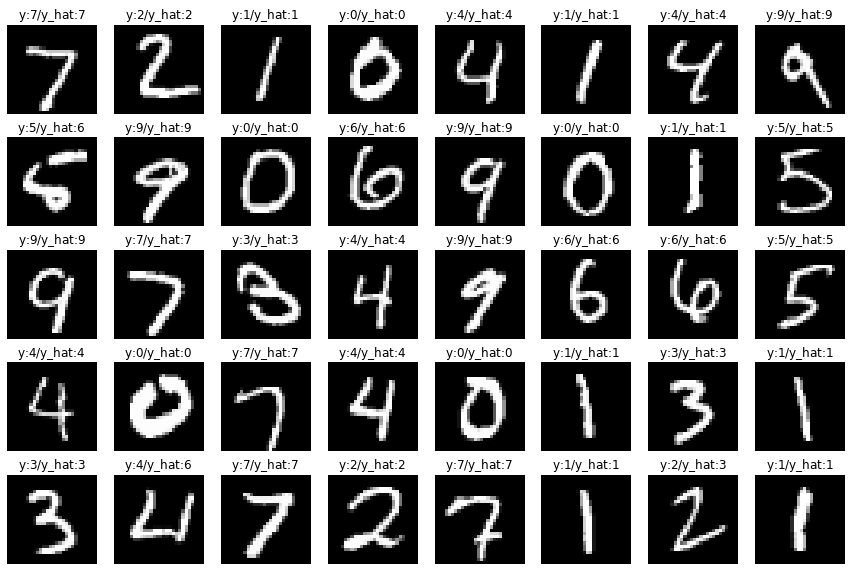

In [19]:
fig = plt.figure(figsize=(15,10))
for i in range(40):
    ax = fig.add_subplot(5, 8, i + 1)
    ax.imshow(X_test[i].reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(f'y:${y_test[i]}$/y_hat:${test_preds[i]}$')
    plt.axis('off')